In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Importante

In [31]:
def MatrixConfusão(pred, ytrue):
    unique = len(np.unique(pred))   
    matrix = np.zeros(shape=(unique,unique))

    for p,t in zip(pred,ytrue):
        if p==t:
            matrix[t,t] += 1
        else:
            matrix[t,p] += 1
    return matrix

def acuracia(pred, ytrue):
    matrix = MatrixConfusão(pred, ytrue)

    predCorretas = 0
    for i in np.unique(pred):
        for j in np.unique(pred):
            if i==j:
                predCorretas += matrix[i,j]
    
    return predCorretas/np.sum(matrix)

### Classificar MNIST

In [5]:
from sklearn.datasets import fetch_openml

In [6]:
mnist = fetch_openml('mnist_784',version=1)

In [7]:
X, y = mnist['data'], mnist['target']

'5'

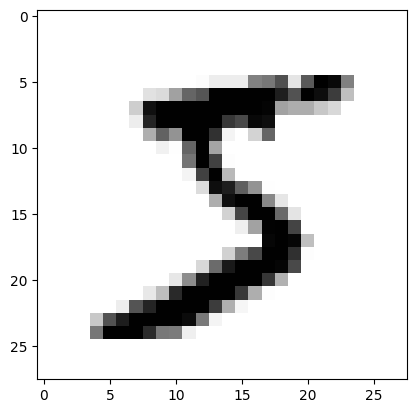

In [8]:
display(y[0])
fig = X.iloc[0,:].values.reshape(-28,28)
plt.imshow(fig, cmap='binary')
plt.show()

In [9]:
y = y.astype(int)

In [23]:
xtrain ,xtest ,ytrain ,ytest = X.iloc[:60000].values ,X.iloc[60000:].values ,y[:60000] ,y[60000:]

xtrain.shape ,xtest.shape

((60000, 784), (10000, 784))

&nbsp;

### Classificador Binario
Classificar algarismo 5 

In [24]:
ytrainFive = np.where( ytrain == 5 ,1 ,0)
ytestFive  = np.where( ytest  == 5 ,1 ,0)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(xtrain,ytrainFive)

SGDClassifier(random_state=42)

In [13]:
sgd.predict([X.iloc[0].values])

array([1])

In [14]:
pred = sgd.predict(xtest)

In [33]:
MatrixConfusão(pred,ytestFive),acuracia(pred,ytestFive)

(array([[8707.,  401.],
        [ 107.,  785.]]),
 0.9492)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
confusion_matrix(ytestFive,pred),accuracy_score(pred ,ytestFive)

(array([[8707,  401],
        [ 107,  785]], dtype=int64),
 0.9492)

In [39]:
precision_score(ytestFive,pred),recall_score(ytestFive, pred)

(0.6618887015177066, 0.8800448430493274)